## Introduction

Performing Exploratory Data Analysis (EDA) on COVID-19 vaccination dataset. This project demonstrates the power of EDA by investigating COVID-19 vaccination data across the United Kingdom. Sourced from the [UK government's Coronavirus Vaccinations page](https://coronavirus.data.gov.uk/details/vaccinations), the dataset spans from early 2021 to mid-2022 and tracks the administration of first, second, and third doses. This EDA will visualize and analyze this data, aiming to identify trends and patterns that may have implications for public health decision-making.

### Import the required libraries

In [1]:
# import the data analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis (EDA)

### 1. Descriptive Statistics for the Dataset

In [2]:
# connect to google drive.
from google.colab import drive
drive.mount('/content/drive') # mount google drive

Mounted at /content/drive


In [3]:
# load the data to dataframe
df = pd.read_excel("drive/MyDrive/EDA-ASSIGNMENT/UK_VaccinationsData.xlsx")
column_info = pd.read_excel("drive/MyDrive/EDA-ASSIGNMENT/UK_VaccinationsData.xlsx", sheet_name="description of variables")

#### Understanding the variables (columns)

Checking to know and understand the variables in the data i.e. the features or columns, will help to determine which variable in the data to analyze.

In [4]:
# show the column descriptions
column_info

,variable,description
0,areaName,the name of the location (nation within UK cou...
1,areaCode,location identification code
2,year,the year in which the vaccination was taken
3,month,the year in which the vaccination was taken
4,Quarter,"the quarter (one-fourth) of the year, e.g. Q1 ..."
5,day,the day in which vaccination was taken
6,WorkingDay,"whether the day is working day (i.e., Yes) or ..."
7,FirstDose,the number of people that took the first dose ...
8,SecondDose,the number of people that took the second dose...
9,ThirdDose,the number of people that took the third dose ...


#### Data Summary

In [5]:
# check the frst five records of the data
df.head()

,areaName,areaCode,year,month,Quarter,day,WorkingDay,FirstDose,SecondDose,ThirdDose,Booster
0,England,E92000001,2022.0,5,Q2,Mon,Yes,3034.0,3857.0,8747.0,1
1,England,E92000001,2022.0,5,Q2,Sun,No,5331.0,3330.0,4767.0,0
2,England,E92000001,2022.0,5,Q2,Sat,No,13852.0,9759.0,12335.0,0
3,England,E92000001,2022.0,5,Q2,Fri,Yes,5818.0,5529.0,10692.0,0
4,England,E92000001,2022.0,5,Q2,Thu,Yes,8439.0,6968.0,11701.0,0


In [6]:
# check thee columns data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   areaName    904 non-null    object 
 1   areaCode    904 non-null    object 
 2   year        903 non-null    float64
 3   month       904 non-null    int64  
 4   Quarter     903 non-null    object 
 5   day         903 non-null    object 
 6   WorkingDay  902 non-null    object 
 7   FirstDose   900 non-null    float64
 8   SecondDose  901 non-null    float64
 9   ThirdDose   898 non-null    float64
 10  Booster     904 non-null    int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 77.8+ KB


In [7]:
# check the shape of the data
df.shape

(904, 11)

In [8]:
# A general description for the data
df.describe()

,year,month,FirstDose,SecondDose,ThirdDose,Booster
count,903.000000,904.000000,900.000000,901.000000,898.000000,904.000000
mean,2021.625692,5.946903,4994.323333,5574.125416,42529.570156,0.648230
std,0.484212,4.146467,9651.335670,9174.101390,104877.579915,0.477787
min,2021.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2021.000000,2.000000,338.500000,478.000000,1313.500000,0.000000
50%,2022.000000,4.000000,876.500000,971.000000,6992.000000,1.000000
75%,2022.000000,11.000000,3653.250000,5770.000000,23464.750000,1.000000
max,2022.000000,12.000000,115551.000000,48491.000000,830403.000000,1.000000


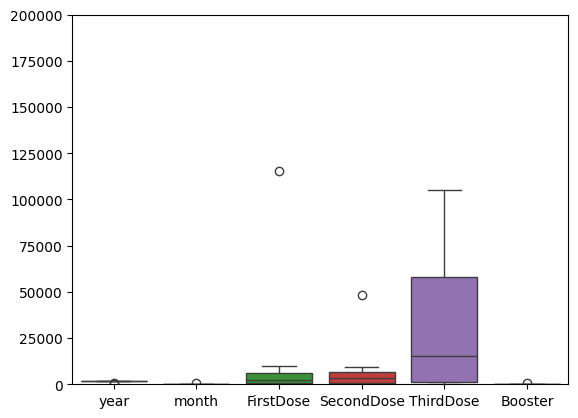

In [9]:
# make a summary with box plots
sns.boxplot(df.describe());
plt.ylim(0, 200000);

In [10]:
df.columns

Index(['areaName', 'areaCode', 'year', 'month', 'Quarter', 'day', 'WorkingDay',
       'FirstDose', 'SecondDose', 'ThirdDose', 'Booster'],
      dtype='object')

In [11]:
# summary of the doses
doses = df[["FirstDose", "SecondDose", "ThirdDose"]]
doses.describe()

,FirstDose,SecondDose,ThirdDose
count,900.000000,901.000000,898.000000
mean,4994.323333,5574.125416,42529.570156
std,9651.335670,9174.101390,104877.579915
min,0.000000,0.000000,0.000000
25%,338.500000,478.000000,1313.500000
50%,876.500000,971.000000,6992.000000
75%,3653.250000,5770.000000,23464.750000
max,115551.000000,48491.000000,830403.000000


### Handle Missing Value
Handling missing values is crucial as to ensure accurate analysis which involves strategies to manage and fill in data points that are absent or unknown in a dataset, ensuring the integrity and completeness of the analysis.

#### Starting by looking for the missing values
**Check all the null values in each column**

In [12]:
# check for null values
df.isna().sum()

areaName      0
areaCode      0
year          1
month         0
Quarter       1
day           1
WorkingDay    2
FirstDose     4
SecondDose    3
ThirdDose     6
Booster       0
dtype: int64

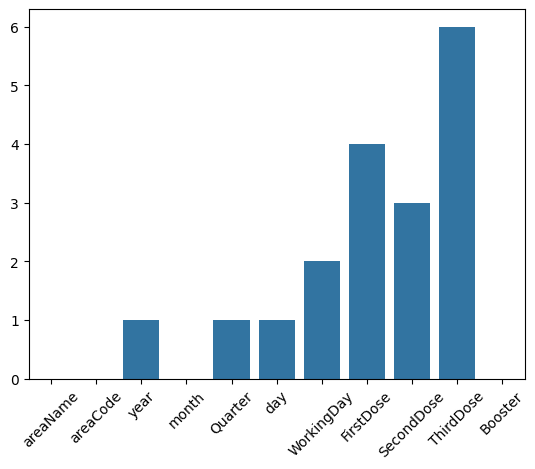

In [13]:
# showing the result in bar plot
sns.barplot(df.isna().sum());
plt.xticks(rotation=45);

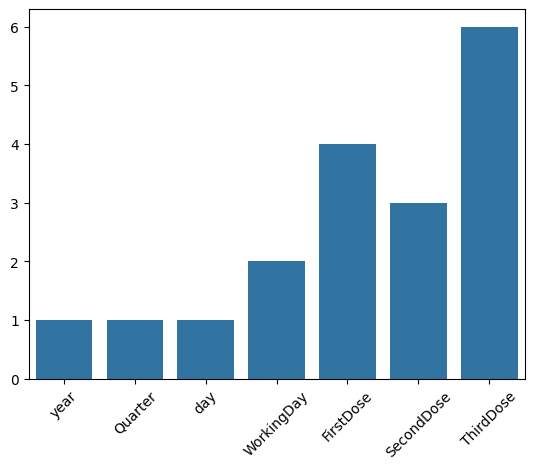

In [14]:
# taking out the only columns that has missing values
null_df = df.isna().sum()
sns.barplot(null_df[null_df > 0]);
plt.xticks(rotation=45);

#### Handing missing values for each column


*   year Column



In [15]:
# filtering out the record that has missing values in the year column
df[df['year'].isna()]

,areaName,areaCode,year,month,Quarter,day,WorkingDay,FirstDose,SecondDose,ThirdDose,Booster
475,Scotland,S92000003,NaN,5,Q2,Thu,Yes,209.0,436.0,848.0,1


There is only one record that didn't have a value for the year column. So, checking the neigbouring records will help in deciding what value to fill it.

In [16]:
# checking the records arround the target record
df.loc[470:480]

,areaName,areaCode,year,month,Quarter,day,WorkingDay,FirstDose,SecondDose,ThirdDose,Booster
470,Northern Ireland,N92000002,2021.0,10,Q4,NaN,Yes,297.0,896.0,752.0,0
471,Northern Ireland,N92000002,2021.0,9,Q3,Thu,Yes,777.0,864.0,NaN,0
472,Scotland,S92000003,2022.0,5,Q2,Sun,No,959.0,777.0,1100.0,0
473,Scotland,S92000003,2022.0,5,Q2,Sat,No,1115.0,735.0,950.0,0
474,Scotland,S92000003,2022.0,5,Q2,Fri,Yes,424.0,546.0,912.0,1
475,Scotland,S92000003,NaN,5,Q2,Thu,Yes,209.0,436.0,848.0,1
476,Scotland,S92000003,2022.0,5,Q2,Wed,Yes,256.0,444.0,842.0,1
477,Scotland,S92000003,2022.0,5,Q2,Tue,Yes,183.0,347.0,776.0,1
478,Scotland,S92000003,2022.0,5,Q2,Mon,Yes,236.0,430.0,1007.0,1
479,Scotland,S92000003,2022.0,5,Q2,Sun,No,NaN,587.0,942.0,1


From the resulting records. 2022 has the highest potential of filling the missing value.

In [17]:
# fill the missing year with the value: 2022
df["year"] = df['year'].fillna(method="bfill").astype(np.int32)

In [18]:
df[df['year'].isna()]
df.loc[470:480]

,areaName,areaCode,year,month,Quarter,day,WorkingDay,FirstDose,SecondDose,ThirdDose,Booster
470,Northern Ireland,N92000002,2021,10,Q4,NaN,Yes,297.0,896.0,752.0,0
471,Northern Ireland,N92000002,2021,9,Q3,Thu,Yes,777.0,864.0,NaN,0
472,Scotland,S92000003,2022,5,Q2,Sun,No,959.0,777.0,1100.0,0
473,Scotland,S92000003,2022,5,Q2,Sat,No,1115.0,735.0,950.0,0
474,Scotland,S92000003,2022,5,Q2,Fri,Yes,424.0,546.0,912.0,1
475,Scotland,S92000003,2022,5,Q2,Thu,Yes,209.0,436.0,848.0,1
476,Scotland,S92000003,2022,5,Q2,Wed,Yes,256.0,444.0,842.0,1
477,Scotland,S92000003,2022,5,Q2,Tue,Yes,183.0,347.0,776.0,1
478,Scotland,S92000003,2022,5,Q2,Mon,Yes,236.0,430.0,1007.0,1
479,Scotland,S92000003,2022,5,Q2,Sun,No,NaN,587.0,942.0,1




*   Quarter Column




In [19]:
df[["month", "Quarter"]].sample(15)

,month,Quarter
275,4,Q2
673,11,Q4
396,12,Q4
684,10,Q4
179,11,Q4
791,2,Q1
149,12,Q4
198,11,Q4
248,5,Q2
47,4,Q2


In [20]:
# filtering out the record that has missing values in the year column
def calculate_qutr(month):
  """calculating the quaters base on the month"""
  if 1 <= month <= 3:
    return "Q1"
  elif 4 <= month <= 6:
    return "Q2"
  elif 7 <= month <= 9:
    return "Q3"
  else:
    return "Q4"

df["Quarter"] = df["month"].apply(calculate_qutr)


In [21]:
# check for null values again
df.isna().sum()

areaName      0
areaCode      0
year          0
month         0
Quarter       0
day           1
WorkingDay    2
FirstDose     4
SecondDose    3
ThirdDose     6
Booster       0
dtype: int64



*   day column



In [22]:
# filtering out the record that has missing values in the year column
df[df['day'].isna()]

,areaName,areaCode,year,month,Quarter,day,WorkingDay,FirstDose,SecondDose,ThirdDose,Booster
470,Northern Ireland,N92000002,2021,10,Q4,NaN,Yes,297.0,896.0,752.0,0


_Afer thoroughly study the pattern of the day column from the dataset the single null value in the column has to be replace with "**Fri**"_

In [23]:
df['day'] = df['day'].fillna("Fri")

In [24]:
# check for null values again
df.isna().sum()

areaName      0
areaCode      0
year          0
month         0
Quarter       0
day           0
WorkingDay    2
FirstDose     4
SecondDose    3
ThirdDose     6
Booster       0
dtype: int64

* WorkingDay column

In [25]:
df[["day", "WorkingDay"]].sample(20)

,day,WorkingDay
714,Thu,Yes
241,Wed,Yes
463,Fri,Yes
887,Sat,No
407,Fri,Yes
137,Thu,Yes
120,Sun,No
278,Mon,Yes
732,Sun,No
81,Thu,Yes


A day is a working day if it's either **Sat** or **Sun**

In [26]:
df["WorkingDay"] = df["day"].apply(lambda day: "Yes" if day not in ["Sat", "Sun"] else "No")

In [27]:
# check for null values again
df.isna().sum()

areaName      0
areaCode      0
year          0
month         0
Quarter       0
day           0
WorkingDay    0
FirstDose     4
SecondDose    3
ThirdDose     6
Booster       0
dtype: int64

Dealing with the list of doses columns
* FirstDose
* SecondDose
* ThirdDose



In [28]:
# calculating the percentages of the missing values in the doses columns
for null in df.columns[df.isna().sum() > 0]:
  percent = df[null].isna().sum() / len(df) * 100
  print(f"The percentage of missing values in {null} column is {round(percent,2)}%")

The percentage of missing values in FirstDose column is 0.44%
The percentage of missing values in SecondDose column is 0.33%
The percentage of missing values in ThirdDose column is 0.66%


The percentage of the missing values in the doses columns are very low not even up to 1%, so the missing column can be replaced with the mean of each column or droping the data point when taking the ouliers into account.

But before conclude on replacing the missing values with the mean of the column. Let's check for outliers as it can affect the distribution as well as the assumption

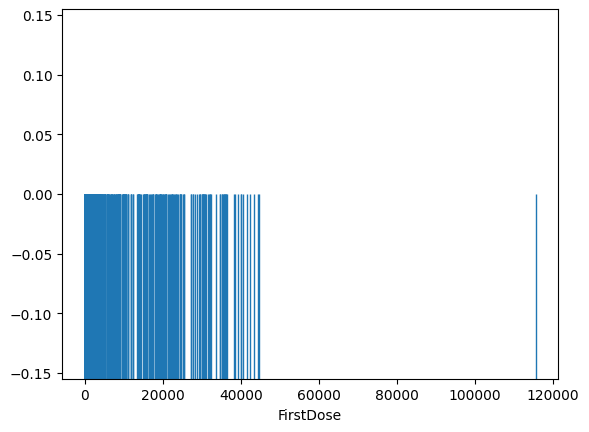

In [29]:
# performing rug plot on the variable
sns.rugplot(data=df, x="FirstDose", height=0.5);

Performing a rug plot on the **FirstDose** variable reveal the outliers in the variable which has effect on the distribution.. Let's take a look and handle it.

In [30]:
# filter the FirstDose variable to get the outlier
df[df["FirstDose"] > 60000]

,areaName,areaCode,year,month,Quarter,day,WorkingDay,FirstDose,SecondDose,ThirdDose,Booster
194,England,E92000001,2021,11,Q4,Wed,Yes,115551.0,43996.0,465913.0,0


In [31]:
# drop the data point with firstdose outlier
df = df[df["FirstDose"] < 60000]

In [32]:
df[df["FirstDose"] > 60000]

,areaName,areaCode,year,month,Quarter,day,WorkingDay,FirstDose,SecondDose,ThirdDose,Booster


In [33]:
df["FirstDose"] = df["FirstDose"].fillna(df["FirstDose"].mean()).astype(np.int32)

<ipython-input-33-dec0f4367b5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["FirstDose"] = df["FirstDose"].fillna(df["FirstDose"].mean()).astype(np.int32)


Check for the **SecondDose** and the **ThirdDose** columns using box plot

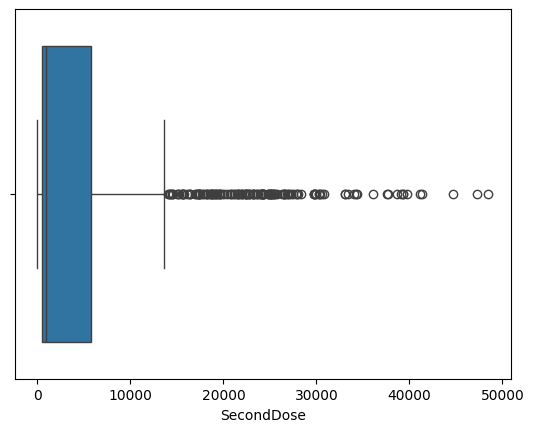

In [34]:
# performing box plot on the variable
sns.boxplot(data=df, x="SecondDose");

The **SecondDose** variable has no outliers. Let's do for the last column (**ThirdDose**)

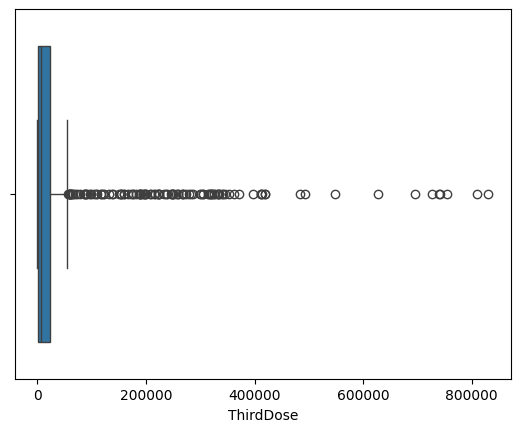

In [35]:
# performing box plot on the variable
sns.boxplot(data=df, x="ThirdDose");

In [36]:
df["SecondDose"] = df["SecondDose"].fillna(df["SecondDose"].mean()).astype(np.int32)
df["ThirdDose"] = df["ThirdDose"].fillna(df["ThirdDose"].mean()).astype(np.int32)

In [37]:
# check for null values again
df.isna().sum()

areaName      0
areaCode      0
year          0
month         0
Quarter       0
day           0
WorkingDay    0
FirstDose     0
SecondDose    0
ThirdDose     0
Booster       0
dtype: int64

Done with the handling of missing values

In [38]:
df.head(10)

,areaName,areaCode,year,month,Quarter,day,WorkingDay,FirstDose,SecondDose,ThirdDose,Booster
0,England,E92000001,2022,5,Q2,Mon,Yes,3034,3857,8747,1
1,England,E92000001,2022,5,Q2,Sun,No,5331,3330,4767,0
2,England,E92000001,2022,5,Q2,Sat,No,13852,9759,12335,0
3,England,E92000001,2022,5,Q2,Fri,Yes,5818,5529,10692,0
4,England,E92000001,2022,5,Q2,Thu,Yes,8439,6968,11701,0
5,England,E92000001,2022,5,Q2,Wed,Yes,4955,5247,11219,1
6,England,E92000001,2022,5,Q2,Tue,Yes,4821,5309,11361,1
7,England,E92000001,2022,5,Q2,Mon,Yes,4337,4893,10343,1
8,England,E92000001,2022,5,Q2,Sun,No,8513,4546,6080,0
9,England,E92000001,2022,5,Q2,Sat,No,17404,11423,13473,0


### Building visuals to obtain insights from the data

#### A. Distribution of individual continuous variables




* For the **FirstDose** column

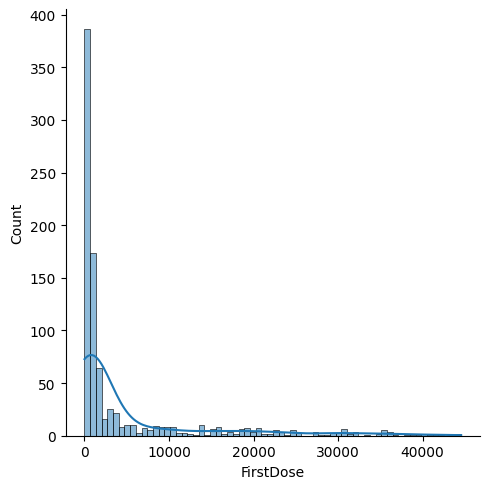

In [39]:
sns.displot(data=df, x="FirstDose", kde=True);

* For the **SecondDose** column

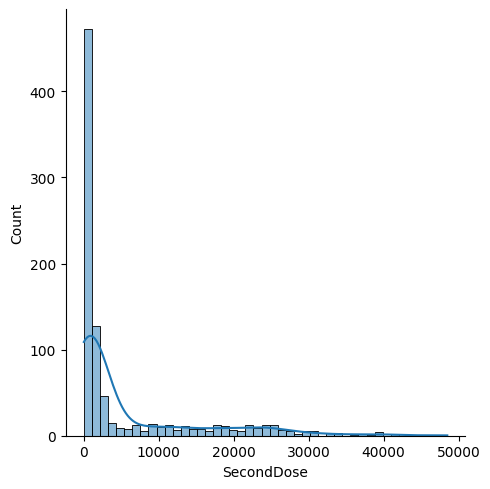

In [40]:
sns.displot(data=df, x="SecondDose", kde=True);

* For the **ThirdDose** column

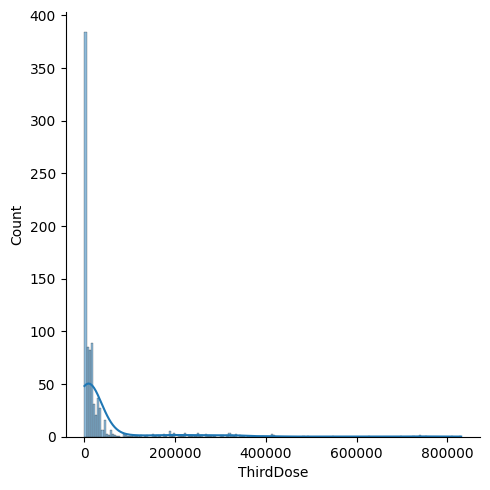

In [41]:
sns.displot(data=df, x="ThirdDose", kde=True);

#### B. Relationship of continuous varialbles


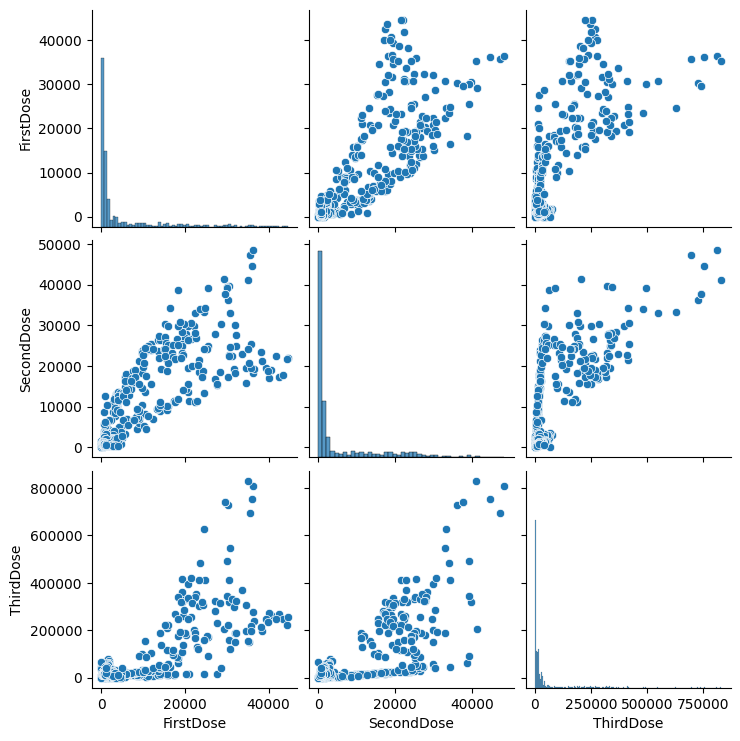

In [42]:
sns.pairplot(data=df[["FirstDose", "SecondDose", "ThirdDose"]]);

#### C. Association between the categorical and continuous variables

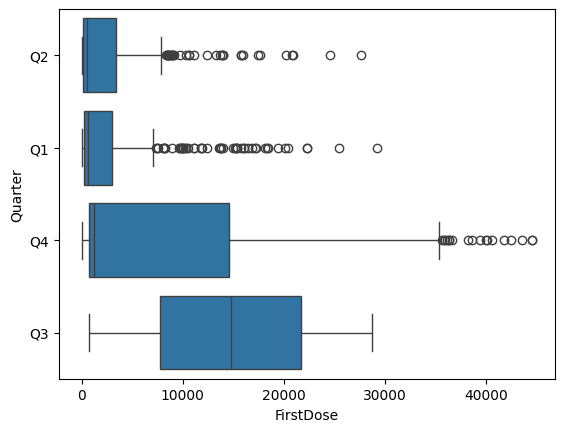

In [43]:
# comparing FirstDose variable with the Quarter
sns.boxplot(data=df, x="FirstDose", y="Quarter");

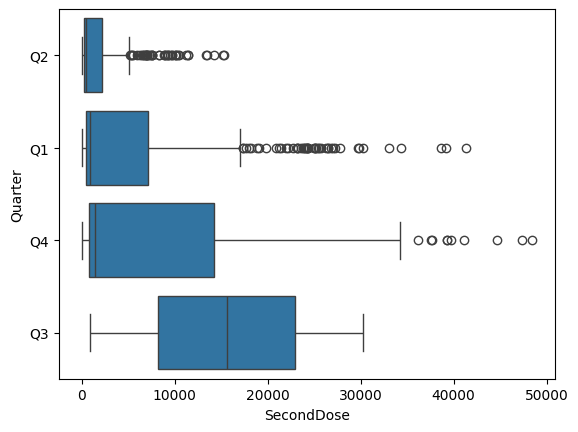

In [44]:
# comparing SecondDose variable with the Quarter
sns.boxplot(data=df, x="SecondDose", y="Quarter");

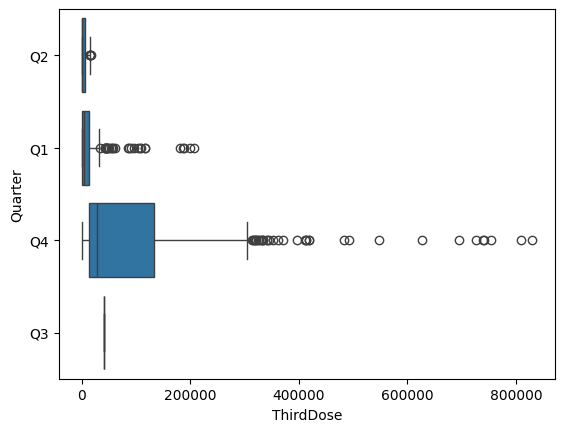

In [45]:
# comparing ThirdDose variable with the Quarter
sns.boxplot(data=df, x="ThirdDose", y="Quarter");

#### D. Relationships between more than two variables

In [46]:
df.corr()

<ipython-input-46-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,month,FirstDose,SecondDose,ThirdDose,Booster
year,1.000000,-0.957563,-0.282596,-0.158447,-0.404678,0.197682
month,-0.957563,1.000000,0.244763,0.103942,0.388899,-0.227121
FirstDose,-0.282596,0.244763,1.000000,0.854020,0.784474,-0.202258
SecondDose,-0.158447,0.103942,0.854020,1.000000,0.762423,0.046350
ThirdDose,-0.404678,0.388899,0.784474,0.762423,1.000000,-0.014803
Booster,0.197682,-0.227121,-0.202258,0.046350,-0.014803,1.000000


<Axes: xlabel='FirstDose', ylabel='SecondDose'>

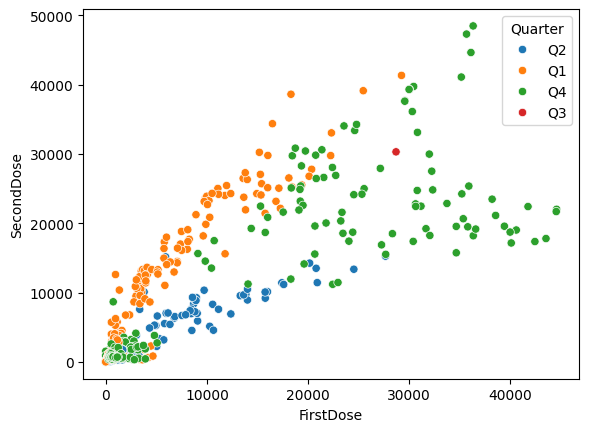

In [47]:
sns.scatterplot(data=df, x="FirstDose", y="SecondDose", hue="Quarter")

In [48]:
# sns.lineplot(data=df, x="year", y="SecondDose");

### Unique values and their frequencies

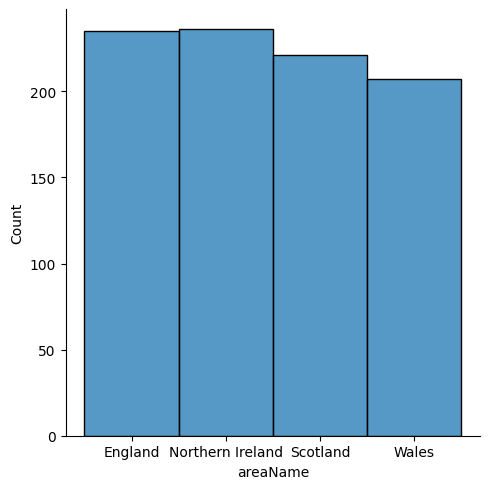

In [49]:
sns.displot(data=df, x="areaName");

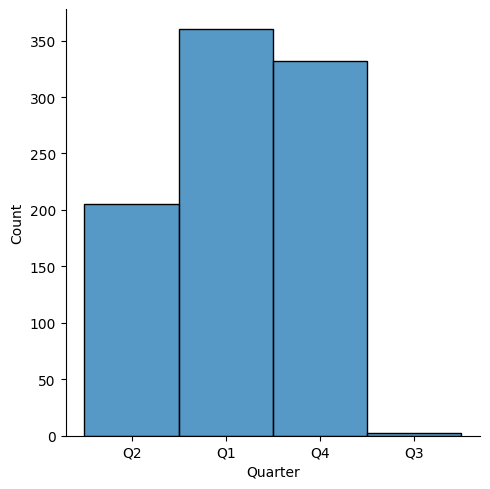

In [50]:
sns.displot(data=df, x="Quarter");

### Contingency table of two potentially related categorical variables

In [51]:
# sns.heatmap(data=df[["FirstDose", "SecondDose", "ThirdDose"]]);

In [52]:
contingency_table = pd.crosstab(df["month"], df["day"], margins=True)

In [53]:
contingency_table

day,Fri,Mon,Sat,Sun,Thu,Tue,Wed,All
month,,,,,,,,
1,16,20,20,20,16,16,16,124
2,16,16,16,16,16,16,16,112
3,16,16,16,16,20,20,20,124
4,20,16,20,16,16,16,16,120
5,11,14,11,14,11,12,12,85
9,0,0,0,0,2,0,0,2
10,15,11,15,15,13,11,12,92
11,16,20,16,16,16,19,15,118
12,20,16,15,15,20,16,20,122


In [54]:
from scipy.stats import chi2_contingency

# Calculating the chi-square test statistic
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [55]:
print('Chi-square Statistic: %0.3f, p-value: %0.3f' % (chi2, p))

Chi-square Statistic: 21.965, p-value: 1.000


### Subset of rows based on two or more criteria

In [56]:
df.head()

,areaName,areaCode,year,month,Quarter,day,WorkingDay,FirstDose,SecondDose,ThirdDose,Booster
0,England,E92000001,2022,5,Q2,Mon,Yes,3034,3857,8747,1
1,England,E92000001,2022,5,Q2,Sun,No,5331,3330,4767,0
2,England,E92000001,2022,5,Q2,Sat,No,13852,9759,12335,0
3,England,E92000001,2022,5,Q2,Fri,Yes,5818,5529,10692,0
4,England,E92000001,2022,5,Q2,Thu,Yes,8439,6968,11701,0


* What is the average of doses given to the England in 2022?

In [57]:
avg_doses = df[(df["areaName"] == "England") & (df["year"] == 2022)][["FirstDose", "SecondDose", "ThirdDose"]].mean()

In [58]:
avg_doses

FirstDose      9914.496503
SecondDose    14967.279720
ThirdDose     30476.405594
dtype: float64

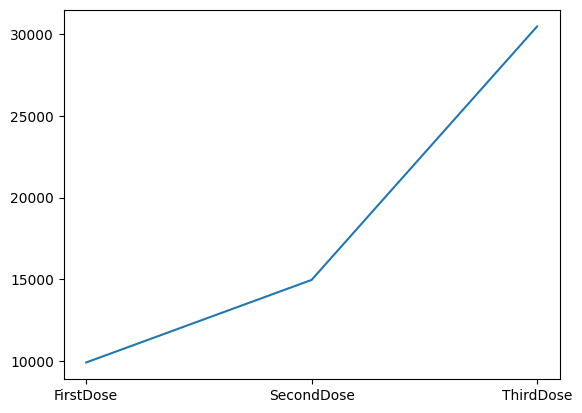

In [59]:
plt.plot(avg_doses.index, avg_doses);

* Which Quarter has the highest doses?

In [60]:
df.groupby(df["Quarter"]).max().sort_values(ascending=False, by=["FirstDose"])

,areaName,areaCode,year,month,day,WorkingDay,FirstDose,SecondDose,ThirdDose,Booster
Quarter,,,,,,,,,,
Q4,Wales,W92000004,2021,12,Wed,Yes,44558,48491,830403,1
Q1,Wales,W92000004,2022,3,Wed,Yes,29231,41351,206676,1
Q3,Northern Ireland,N92000002,2021,9,Thu,Yes,28689,30318,42132,0
Q2,Wales,W92000004,2022,5,Wed,Yes,27649,15265,17742,1


### Performing the group by operations to create subset tables

In [61]:
df.groupby(df["year"]).sum()[["FirstDose", "SecondDose", "ThirdDose"]]

<ipython-input-61-ade8fc4c83cb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(df["year"]).sum()[["FirstDose", "SecondDose", "ThirdDose"]]


,FirstDose,SecondDose,ThirdDose
year,,,
2021,2721865,2476571,32318271
2022,1657475,2506041,5558934


In [62]:
df.groupby(df["year"]).mean()[["FirstDose", "SecondDose", "ThirdDose"]]

<ipython-input-62-b9f6a6d74e23>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(df["year"]).mean()[["FirstDose", "SecondDose", "ThirdDose"]]


,FirstDose,SecondDose,ThirdDose
year,,,
2021,8149.296407,7414.883234,96761.290419
2022,2933.584071,4435.470796,9838.821239


In [63]:
df.groupby(df["Booster"]).sum()[["FirstDose", "SecondDose", "ThirdDose"]]

<ipython-input-63-f25bf4f29714>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(df["Booster"]).sum()[["FirstDose", "SecondDose", "ThirdDose"]]


,FirstDose,SecondDose,ThirdDose
Booster,,,
0,2308137,1565223,13930735
1,2071203,3417389,23946470


## Linear Regression Model

###Introduction
Linear regression is a foundational statistical technique used for modeling the relationship between a dependent variable and one or more independent variables. The basic idea is to fit a straight line to the data that best represents the relationship between the variables.

In simple linear regression, there is only one independent variable, while in multiple linear regression, there are multiple independent variables. The relationship between the variables is typically represented by the equation of a straight line:

**𝓨 = 𝒎𝒙 + β**

Let'sstart by droping the columns that are not relevant to the Machine Learning algorithms. E.g. **areaCode**

**To Implement a linear regression model, there should be a question to answer or a problem to solve.**

So, the problem is to **"Predict the total people that may come for the last dose of vaccine"** according to the historical data of the first and the second set of people that took the doses.

We need to perform a further clean up of the data in other to feed the algorithm

In [66]:
# checking for duplicate data
df.duplicated().sum()

0

No duplicate data points

Now, drop the the unnecessary column.

In [71]:
data = df[["FirstDose", "SecondDose", "ThirdDose"]]

In [72]:
data.corr()

,FirstDose,SecondDose,ThirdDose
FirstDose,1.000000,0.854020,0.784474
SecondDose,0.854020,1.000000,0.762423
ThirdDose,0.784474,0.762423,1.000000


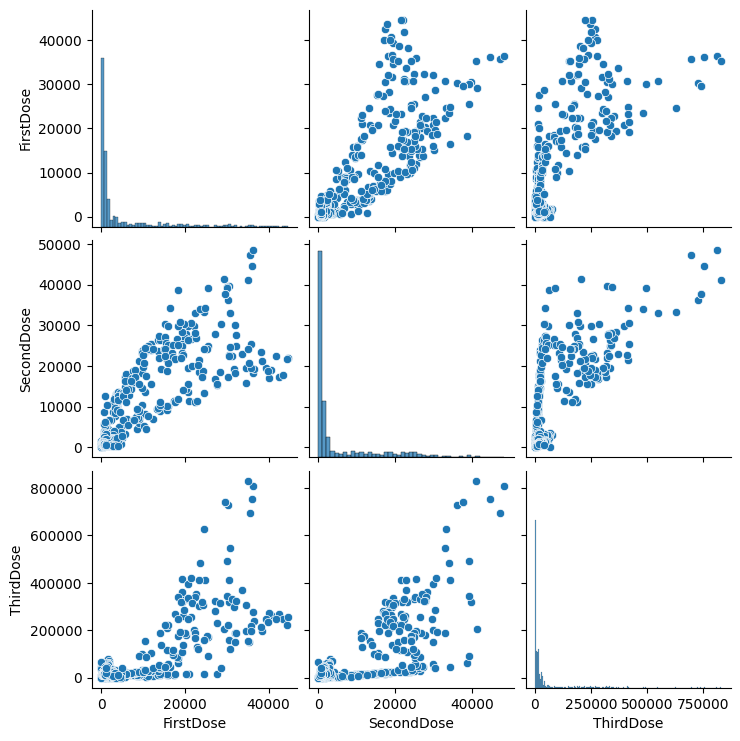

In [70]:
# check the relationship of the three variables
sns.pairplot(data=data);

### Building the ML Model

#### Separating the Features and the Label

In [74]:
# for the X
X = data.drop('ThirdDose', axis=1)
X

,FirstDose,SecondDose
0,3034,3857
1,5331,3330
2,13852,9759
3,5818,5529
4,8439,6968
...,...,...
899,3266,528
900,2831,322
901,3921,439
902,1238,717


In [75]:
# for the y
y = data["ThirdDose"]
y

0       8747
1       4767
2      12335
3      10692
4      11701
       ...  
899    22390
900     6546
901    10787
902    18583
903    42132
Name: ThirdDose, Length: 899, dtype: int32

#### Sci-kit Learn
A Python library for machine learning, offering tools for classification, regression, clustering, preprocessing, and evaluation, making it popular for data analysis and modeling tasks.






#### Data spliting: Into train and Test set.

In [76]:
from sklearn.model_selection import train_test_split

In [80]:
# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Data spliting was done on the data with 75% train set and 25% test set.

In [82]:
X_train

,FirstDose,SecondDose
301,185,326
592,762,3182
409,1856,1262
853,427,827
736,355,283
...,...,...
106,6030,14047
271,14,53
864,399,934
436,1894,1247


In [83]:
y_train

301      414
592     6934
409    16033
853    19201
736      843
       ...  
106    14954
271      166
864    15692
436     9879
102    24703
Name: ThirdDose, Length: 674, dtype: int32

#### Linear Regression Algorithm

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
# instanciate the estimator
model = LinearRegression()

In [86]:
# train the model
model.fit(X_train, y_train)

LinearRegression()

In [88]:
# predict
test_predictions = model.predict(X_test)

#### Performance metrics
* Mean Squared Error
* Mean Absolute Error
* Root Mean Squared Error

In [89]:
# import the metrics for evaluating the model
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [95]:
mae = mean_absolute_error(y_test, test_predictions)

In [96]:
mse = mean_squared_error(y_test, test_predictions)

In [97]:
rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

In [102]:
evaluations = pd.Series([mae, rmse], index=["Mean Absolute Error", "Root Mean Squared Error"])

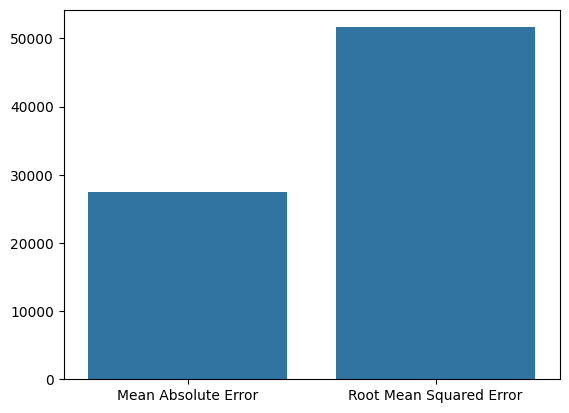

In [104]:
sns.barplot(data=evaluations);

In [105]:
y.mean()

42132.597330367076